<h1>Jonathan Forsyth
    
    Coding Assesment


In [1]:
#List of imports
suppressMessages(library(dplyr))
library(maftools)
library(stringr)
suppressMessages(library(ggplot2))

------------------------

------------------------

<h1> 1. Download the dataset linked to above and load the Mutation Annotation Format (MAF) files.

In [2]:
# Loading all files into a single dataframe

# This creates a list of all files in the mafs/ directory
files_of_patients<-list.files(path='mafs/')

# Applying the read.delim function over the list of files, the calling rbind over the ouput dataframes
combined_patient_df<-do.call(rbind, lapply(files_of_patients, function(x) read.delim(file=paste('mafs/', x, sep = ''))))
write.table(combined_patient_df, 'combined_patient_df.maf', sep = '\t', quote = F, row.names = F) #Writing this for later enirhcment analysis                                           
                                           
head(combined_patient_df) #Printing head for visibility
tail(combined_patient_df) #Printing tail for visibility

,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Protein_Change,t_alt_count,t_ref_count
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,AMOT,X,112035152,112035152,Missense_Mutation,SNP,G,G,C,Patient-0-Tumor,Patient-0-Normal,p.Q612E,8,31
2,SEMA6D,15,48062786,48062786,Missense_Mutation,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.A676T,4,87
3,PRR12,19,50100969,50100969,Missense_Mutation,SNP,C,C,G,Patient-0-Tumor,Patient-0-Normal,p.S1126C,5,25
4,TNR,1,175372529,175372529,Silent,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.S241S,30,155
5,CPA4,7,129944344,129944344,Silent,SNP,C,C,G,Patient-0-Tumor,Patient-0-Normal,p.A137A,12,100
6,SLC35E2B,1,1607589,1607589,Silent,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.L124L,5,29


,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Protein_Change,t_alt_count,t_ref_count
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
15668,RGL1,1,183852979,183852979,Missense_Mutation,SNP,G,G,C,Patient-9-Tumor,Patient-9-Normal,p.E259Q,14,125
15669,DSC2,18,28669497,28669497,Missense_Mutation,SNP,C,C,G,Patient-9-Tumor,Patient-9-Normal,p.D179H,36,41
15670,DLX4,17,48051151,48051151,Silent,SNP,G,G,A,Patient-9-Tumor,Patient-9-Normal,p.G189G,37,37
15671,PPP4R1,18,9588720,9588720,Nonsense_Mutation,SNP,G,G,A,Patient-9-Tumor,Patient-9-Normal,p.Q143*,7,53
15672,KPRP,1,152733085,152733085,Nonsense_Mutation,SNP,C,C,T,Patient-9-Tumor,Patient-9-Normal,p.Q341*,28,57
15673,KLHL6,3,183211869,183211869,Missense_Mutation,SNP,C,C,G,Patient-9-Tumor,Patient-9-Normal,p.E450Q,86,127


------------------------

------------------------

<h1> 2. Subset for mutations that are not of the Variant Classification “Silent”.

In [3]:
# Filtered the dataframe for non-silent variants
filtered_patient_df<-filter(combined_patient_df, Variant_Classification != 'Silent')
write.table(filtered_patient_df, 'filtered_patient_df.maf', sep = '\t', quote = F, row.names = F) #Writing this for later enrichment analysis                                           

head(filtered_patient_df) #Printing the head for verification

,Hugo_Symbol,Chromosome,Start_position,End_position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Protein_Change,t_alt_count,t_ref_count
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,AMOT,X,112035152,112035152,Missense_Mutation,SNP,G,G,C,Patient-0-Tumor,Patient-0-Normal,p.Q612E,8,31
2,SEMA6D,15,48062786,48062786,Missense_Mutation,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.A676T,4,87
3,PRR12,19,50100969,50100969,Missense_Mutation,SNP,C,C,G,Patient-0-Tumor,Patient-0-Normal,p.S1126C,5,25
4,ZNF253,19,20002885,20002885,Missense_Mutation,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.V277I,6,66
5,MEF2C,5,88025061,88025061,Missense_Mutation,SNP,G,G,A,Patient-0-Tumor,Patient-0-Normal,p.S313L,6,42
6,TTN,2,179613803,179613803,Nonsense_Mutation,SNP,C,C,A,Patient-0-Tumor,Patient-0-Normal,p.E4442*,4,55


------------------------

------------------------

<h1> 3. Find the 15 most common mutations.

In [4]:
# Created a function to apply over the list of uinique genes.
# First, it filters the patient dataframe for the gene (Hugo symbol),
# then counts the number of times the protein change is repeated.
# then joins the 2 dataframes backtogether to retain all information
count_protein_changes<-function(gene){
    isolated_gene<-filtered_patient_df[filtered_patient_df[,1]==gene,][,c(1,12)]
    counts<-isolated_gene %>% count(Protein_Change)
    colnames(counts)[2]<-"Sequence_Count"
    genes_counts_combined<-data.frame('Gene'=rep(gene, nrow(counts)),
                                      counts)
    return(genes_counts_combined)
}

# List of unique genes in the patient dataframe
unique_genes_list<-unique(filtered_patient_df[,1])

# Creates a dataframe with the count of all protein changes for each gene
mutation_count_df<-do.call(rbind, lapply(unique_genes_list, function(x) count_protein_changes(x)))
mutation_count_df[order(desc(mutation_count_df$Sequence_Count)),][1:15,] #Printing the top 15 mutations counted

,Gene,Protein_Change,Sequence_Count
,<chr>,<chr>,<int>
2647,ERBB4,p.S1289A,14
2071,ERBB3,p.H228Q,5
2646,ERBB4,p.Q707E,5
2846,PIK3CA,p.E545K,5
1020,TP53,p.R248Q,4
2073,ERBB3,p.M91I,4
2643,ERBB4,p.E317K,4
2975,FAM47C,p.Q225E,4
3762,RXRA,p.S330F,4


------------------------

------------------------

<h1> 4. Perform a statistical test to explore if any mutated genes are enriched in patients who
either responded or not.

In [5]:
# Loading in sample information
sample_information_df<-read.delim('sample-information.tsv')

# Creating a 'maf' S4 object using the filtered_patient_df we made before -- Easier to do pairwise analysis with 'maftools' program
filtered_patient_maf<-read.maf('filtered_patient_df.maf')

# Adding the patient response to the clinical.data dataframe within the maf object (and non-synonymous mutation rate for later)
filtered_patient_maf@clinical.data<-inner_join(filtered_patient_maf@clinical.data, sample_information_df[,c(2,4,6)], by = 'Tumor_Sample_Barcode')

-Reading
-Validating
-Summarizing
--Possible FLAGS among top ten genes:
  TTN
  MUC16
  SYNE1
-Processing clinical data
--Missing clinical data
-Finished in 0.631s elapsed (0.552s cpu) 


In [6]:
# Runs a pairwise and groupwise comparison analysis on the response feature
response_enrichment<-clinicalEnrichment(filtered_patient_maf, clinicalFeature = 'Response')

# Only generally interested in pairwise analysis, filtering by statistically signifigant (FDR<.05) correlations
# Groupwise comparison had no statistically signifigant findings
enriched_genes<-response_enrichment$pairwise_comparision[response_enrichment$pairwise_comparision$fdr<.05,]
enriched_genes #Printing for visibility

Sample size per factor in Response:




Non-Responder     Responder 
           25            25 


Hugo_Symbol,Feature_1,Feature_2,n_mutated_Feature1,n_mutated_Feature2,fdr
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
ERCC2,Responder,Non-Responder,9 of 25,0 of 25,0.001630835
AKAP9,Responder,Non-Responder,6 of 25,0 of 25,0.022289767
HERC1,Responder,Non-Responder,6 of 25,0 of 25,0.022289767
HECTD1,Responder,Non-Responder,6 of 25,0 of 25,0.022289767
MACF1,Responder,Non-Responder,6 of 25,0 of 25,0.022289767
MROH2B,Responder,Non-Responder,6 of 25,0 of 25,0.022289767
KMT2C,Responder,Non-Responder,7 of 25,1 of 25,0.048797154


------------------------

------------------------

<h1> 5. Create a scatter plot of genes with the number of mutated patients on the x-axis and your results from question 4 on the y-axis.

In [24]:
# Making the n_mutated_Feature1 count a solid number rather than a fraction
enriched_genes$n_mutated_Feature1<-lapply(enriched_genes$n_mutated_Feature1, function(x) str_replace(x, pattern = ' of 25', replacement = ''))
             
#Creating a ggplot object. Decided to add a little bit of jitter to the x variable to make the multiple similar FDR scores visibile.
eg_scatplot<-ggplot(data=enriched_genes, mapping = aes(x = as.numeric(enriched_genes$n_mutated_Feature1), y = fdr))

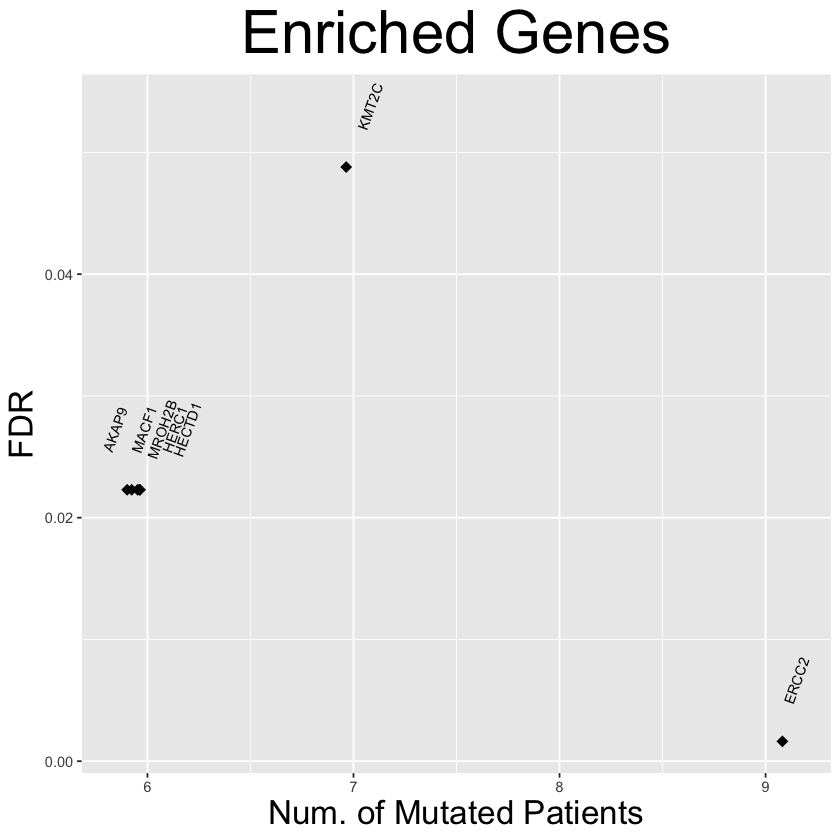

In [30]:
sp<-eg_scatplot+
  geom_point(size=3, shape=18, position = position_jitter(w = 0.1, h = 0))+
  labs(x='Num. of Mutated Patients', y='FDR', title = 'Enriched Genes')+
  geom_text(mapping = aes(x= jitter(as.numeric(enriched_genes$n_mutated_Feature1)),label=enriched_genes$Hugo_Symbol), angle=70, size=3, check_overlap = T, nudge_y = .005)+ #Added non-exhaustive labels to the points
  theme(axis.title.x = element_text(size=20), axis.title.y = element_text(size=20), title=element_text(size=30), plot.title = element_text(hjust = 0.5))
sp

------------------------

------------------------

<h1> 6. How many samples are wild-type versus mutant with respect to the most significantly enriched gene from Question 4? Plot the number of nonsynonymous mutations per megabase in the mutant vs. wild-type samples. Is there a significant difference in the number of mutations between the two groups?

In [9]:
# Filtering for patients with a mutated ERCC2 Gene
mut_ERCC2<-filter(filtered_patient_maf@data, Hugo_Symbol=='ERCC2')
mut_ERCC2

Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Protein_Change,t_alt_count,t_ref_count
<chr>,<chr>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>,<fct>,<chr>,<chr>,<int>,<int>
ERCC2,19,45856346,45856346,Missense_Mutation,SNP,T,T,C,Patient-12-Tumor,Patient-12-Normal,p.D609G,41,74
ERCC2,19,45855816,45855816,Missense_Mutation,SNP,C,C,G,Patient-13-Tumor,Patient-13-Normal,p.G665A,16,47
ERCC2,19,45867687,45867687,Missense_Mutation,SNP,T,T,C,Patient-27-Tumor,Patient-27-Normal,p.N238S,15,27
ERCC2,19,45856355,45856355,Missense_Mutation,SNP,T,T,C,Patient-29-Tumor,Patient-29-Normal,p.E606G,34,53
ERCC2,19,45860619,45860619,Missense_Mutation,SNP,G,G,A,Patient-30-Tumor,Patient-30-Normal,p.P463L,9,42
ERCC2,19,45867584,45867584,Missense_Mutation,SNP,C,C,A,Patient-37-Tumor,Patient-37-Normal,p.V242F,26,13
ERCC2,19,45873425,45873425,Missense_Mutation,SNP,T,T,C,Patient-4-Tumor,Patient-4-Normal,p.Y24C,27,75
ERCC2,19,45873425,45873425,Missense_Mutation,SNP,T,T,C,Patient-44-Tumor,Patient-44-Normal,p.Y24C,21,42
ERCC2,19,45856345,45856345,Missense_Mutation,SNP,G,G,T,Patient-7-Tumor,Patient-7-Normal,p.D609E,61,37


<h3><b> There are 9 patients with a mutated <i>ERCC2</i> allele.

In [10]:
# Creating a table of mutn rates for WT vs Mutated ERCC2
mut<-data.frame(Tumor_Sample_Barcode=mut_ERCC2$Tumor_Sample_Barcode, Allele='mut') #Creating a mutation column for the known mutated patients
mut<-merge(filtered_patient_maf@clinical.data, mut) #Merging with their response and non-synonymous mutation rate

# Creating a similar dataframe as above, but for those without the mutation
wt<-filter(filtered_patient_maf@clinical.data, !(Tumor_Sample_Barcode %in% mut_ERCC2$Tumor_Sample_Barcode)) #Filtering by patients not in the list above
wt<-data.frame(wt, Allele='wt') #Adding their allele

# Binding the 2 dataframes from above
ERCC2_WTvsMUT_dnds<-rbind(mut, wt)
ERCC2_WTvsMUT_dnds # Printing for visibility

Tumor_Sample_Barcode,Response,Nonsynonymous_mutations_per_Mb,Allele
<chr>,<chr>,<dbl>,<chr>
Patient-12-Tumor,Responder,6.98,mut
Patient-13-Tumor,Responder,2.10,mut
Patient-27-Tumor,Responder,9.39,mut
Patient-29-Tumor,Responder,14.10,mut
Patient-30-Tumor,Responder,11.80,mut
Patient-37-Tumor,Responder,19.60,mut
Patient-4-Tumor,Responder,10.50,mut
Patient-44-Tumor,Responder,11.30,mut
Patient-7-Tumor,Responder,10.30,mut


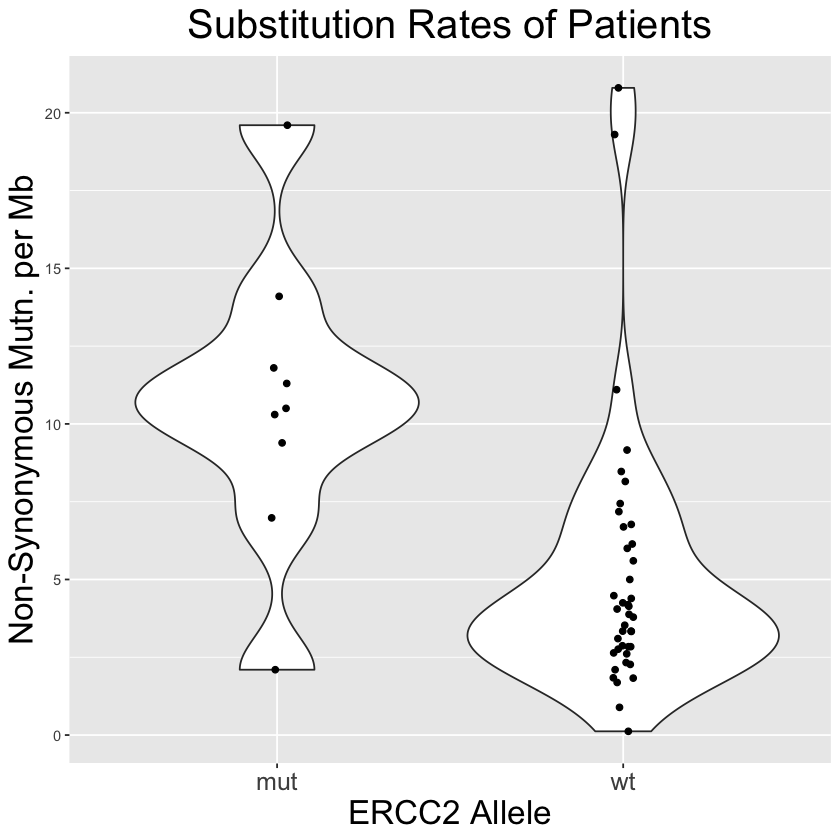

In [38]:
wtvmut<-ggplot(data = ERCC2_WTvsMUT_dnds, mapping = aes(x = Allele, y = Nonsynonymous_mutations_per_Mb))
wtvmut+geom_violin()+geom_point(position = position_jitter(w = 0.03, h = 0))+
labs(title='Substitution Rates of Patients', y='Non-Synonymous Mutn. per Mb', x='ERCC2 Allele')+
theme(axis.title.x = element_text(size=20), axis.title.y = element_text(size=20), title=element_text(size=20), plot.title = element_text(hjust = 0.5), axis.text.x = element_text(size=15))

In [33]:
# T-test on the average difference
t.test(wt$Nonsynonymous_mutations_per_Mb, mut$Nonsynonymous_mutations_per_Mb)


	Welch Two Sample t-test

data:  wt$Nonsynonymous_mutations_per_Mb and mut$Nonsynonymous_mutations_per_Mb
t = -3.2707, df = 10.845, p-value = 0.007589
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.408140 -1.831481
sample estimates:
mean of x mean of y 
 5.054634 10.674444 


<h3><b> This would indicate a statistically signifigant difference in non-synonymous substitution rates between the two groups. (P=.007589)

------------------------

------------------------

<h1> 7. Write any conclusions that you have made based on your analysis. How might this analysis be improved or expanded upon? 

- This analysis has produced a list of 7 candidate genes that positively impact patient response to medication. Atleast 1 of these genes, <i>ERCC2</i>, has a statistically higher mutation rate in patients that respond when compared to patients that do not respond. Genotyping for this gene would be be helpful for a physician trying to determine if this medicine would be appropriate for their patient.

- May be worth running a Principal Component Analysis (PCA) on the overall genotype data to see if Responders have overall similarities in their genotype patterns in comparison to Non-Responders (i.e. if the 2 groups form distinct clusters). Then comparing the genes which strongest correlate to the 1st PC to the list above may further verify their importance.